In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse

2023-09-13 11:11:58.759399: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 11:11:58.787163: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 11:11:58.787604: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 11:11:59.269270: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...


In [ ]:
# each image in the MNIST dataset is represented as a 28x28x1
# image, but in order to apply a standard neural network we must
# first "flatten" the image to be simple list of 28x28=784 pixels
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

In [ ]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
# define the 784-256-128-10 architecture using Keras
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
model.add(Dense(128, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [ ]:
# train the model using SGD
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100


2023-09-13 11:12:01.320784: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 1s 2ms/step - loss: 2.2712 - accuracy: 0.2246 - val_loss: 2.2328 - val_accuracy: 0.4521
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 2.1982 - accuracy: 0.4281 - val_loss: 2.1520 - val_accuracy: 0.5051
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 2.1046 - accuracy: 0.5502 - val_loss: 2.0372 - val_accuracy: 0.6329
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 1.9682 - accuracy: 0.6148 - val_loss: 1.8712 - val_accuracy: 0.6407
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 1.7809 - accuracy: 0.6511 - val_loss: 1.6603 - val_accuracy: 0.6851
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 1.5645 - accuracy: 0.6857 - val_loss: 1.4412 - val_accuracy: 0.7130
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 1.3574 - accuracy: 0.7155 - val_loss: 1.2479 - val_accuracy: 0.7392
Epoch 8/100

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1),
target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.93      0.91      0.92      1032
           3       0.91      0.92      0.91      1010
           4       0.92      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.93      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.90      0.89      0.90       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



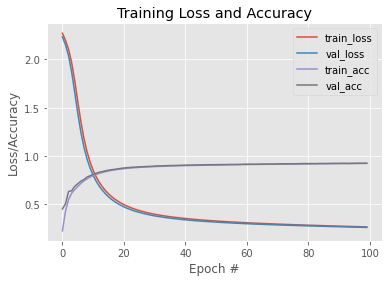

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("output.jpg")

In [ ]:
print("[INFO] accessing MNIST...")
((trainX, trainY), (testX, testY)) = mnist.load_data()

[INFO] accessing MNIST...


In [ ]:
trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
testX = testX.reshape((testX.shape[0], 28 * 28 * 1))
xtest_nonreshape=testX.reshape((testX.shape[0],28,28))

In [ ]:
# scale data to the range of [0, 1]
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [ ]:
# convert the labels from integers to vectors
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [ ]:
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,
metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),
epochs=100, batch_size=128)

[INFO] training network...
Epoch 1/100


2023-09-13 11:15:35.578222: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 [==============================] - 1s 2ms/step - loss: 0.2654 - accuracy: 0.9235 - val_loss: 0.2601 - val_accuracy: 0.9254
Epoch 2/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2645 - accuracy: 0.9234 - val_loss: 0.2592 - val_accuracy: 0.9260
Epoch 3/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2637 - accuracy: 0.9237 - val_loss: 0.2586 - val_accuracy: 0.9261
Epoch 4/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2629 - accuracy: 0.9241 - val_loss: 0.2579 - val_accuracy: 0.9265
Epoch 5/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2620 - accuracy: 0.9242 - val_loss: 0.2578 - val_accuracy: 0.9255
Epoch 6/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2612 - accuracy: 0.9243 - val_loss: 0.2564 - val_accuracy: 0.9265
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.2604 - accuracy: 0.9247 - val_loss: 0.2555 - val_accuracy: 0.9267
Epoch 8/100

In [ ]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=128)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1),
target_names=[str(x) for x in lb.classes_]))

[INFO] evaluating network...
79/79 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.93      0.94      0.94      1010
           4       0.93      0.95      0.94       982
           5       0.93      0.90      0.92       892
           6       0.94      0.96      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.93      0.91      0.92       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



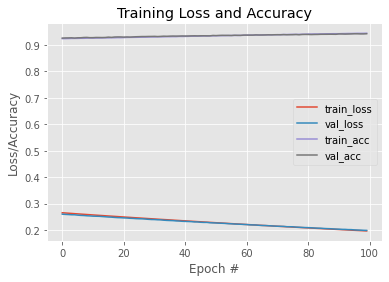

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("output1.jpg")

313/313 [==============================] - 0s 585us/step
The predicted value is 7


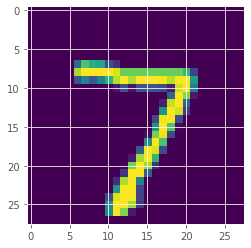

In [ ]:
import random

for i in range(0,9):
    r=random.randint(0,100)
plt.imshow(xtest_nonreshape[r])

prediction=model.predict(testX)
print(f"The predicted value is {np.argmax(prediction[r])}")